In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
#data = pd.read_csv("0.DataSource/df_fuel_ckan.csv")
# https://www.nationalgrideso.com/data-portal/historic-generation-mix

In [12]:
#data

In [13]:
#data = pd.read_excel("0.DataSource/National Demand/df_fuel_ckan.xlsx",sheet_name="Combined")
data = pd.read_csv("0.DataSource/National Demand/df_fuel_ckan_WithDemand.csv")

In [14]:
Month = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
         7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
Seasons = {1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',
         7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'}

In [15]:
data['DATETIME']= pd.to_datetime(data['DATETIME'])

In [16]:
data['Year'] = data['DATETIME'].dt.year
data['Hour'] = data['DATETIME'].dt.hour
data['Month'] = data['DATETIME'].dt.month
data['MonthName'] = data['Month'].map(Month)
data['Seasons'] = data['Month'].map(Seasons)

In [17]:
data.columns

Index(['DATETIME', 'SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'SBP(GBP/MWh)',
       'SSP(GBP/MWh)', 'MID_APX_VOLUME(MWh)', 'MID_APX_PRICE(GBP/MWh)',
       'MID_N2EX_VOLUME(MWh)', 'MID_N2EX_PRICE(GBP/MWh)', 'SSP_(GBP/MWh)',
       'NIV(MWh)', 'NordPool_HH_Vol(MWh)', 'NordPool_HH_Price(GBP/MWh)', 'GAS',
       'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'OTHER',
       'SOLAR', 'STORAGE', 'GENERATION', 'CARBON_INTENSITY', 'LOW_CARBON',
       'ZERO_CARBON', 'RENEWABLE', 'FOSSIL', 'GAS_perc', 'COAL_perc',
       'NUCLEAR_perc', 'WIND_perc', 'HYDRO_perc', 'IMPORTS_perc',
       'BIOMASS_perc', 'OTHER_perc', 'SOLAR_perc', 'STORAGE_perc',
       'GENERATION_perc', 'LOW_CARBON_perc', 'ZERO_CARBON_perc',
       'RENEWABLE_perc', 'FOSSIL_perc', 'NATIONAL DEMAND',
       'TRANSMISSION_SYSTEM_DEMAND', 'ENGLAND_WALES_DEMAND',
       'EMBEDDED_WIND_GENERATION', 'EMBEDDED_WIND_CAPACITY',
       'EMBEDDED_SOLAR_GENERATION', 'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR',
       'PUMP_STORAGE_P

In [34]:
StartingYear = 2009
EndYear = 2023
Years = range(StartingYear,EndYear+1)
for Year in Years:
    dataA = data[data['DATETIME'].dt.year == Year]
    MaxAnnualDemand = int(dataA["NATIONAL DEMAND"].max())
    SeasonData_TSD = dataA.pivot_table(values="NATIONAL DEMAND", index="Hour", columns="Seasons",aggfunc='mean')
    MaxWinterDemand = int(SeasonData_TSD["Winter"].max())
    Ratio = round(MaxAnnualDemand/MaxWinterDemand,2)
    print(f"{Year} = Max Annual = {MaxAnnualDemand} MWe, SeasonalMax(Winter) {MaxWinterDemand} MWe, AnnualPeak/SeasonalPeak(Winter) {Ratio}")

2009 = Max Annual = 58594 MWe, SeasonalMax(Winter) 51284 MWe, AnnualPeak/SeasonalPeak(Winter) 1.14
2010 = Max Annual = 59095 MWe, SeasonalMax(Winter) 52673 MWe, AnnualPeak/SeasonalPeak(Winter) 1.12
2011 = Max Annual = 55113 MWe, SeasonalMax(Winter) 49777 MWe, AnnualPeak/SeasonalPeak(Winter) 1.11
2012 = Max Annual = 55765 MWe, SeasonalMax(Winter) 49221 MWe, AnnualPeak/SeasonalPeak(Winter) 1.13
2013 = Max Annual = 55572 MWe, SeasonalMax(Winter) 48787 MWe, AnnualPeak/SeasonalPeak(Winter) 1.14
2014 = Max Annual = 51208 MWe, SeasonalMax(Winter) 47143 MWe, AnnualPeak/SeasonalPeak(Winter) 1.09
2015 = Max Annual = 52516 MWe, SeasonalMax(Winter) 46119 MWe, AnnualPeak/SeasonalPeak(Winter) 1.14
2016 = Max Annual = 51102 MWe, SeasonalMax(Winter) 44936 MWe, AnnualPeak/SeasonalPeak(Winter) 1.14
2017 = Max Annual = 49883 MWe, SeasonalMax(Winter) 44791 MWe, AnnualPeak/SeasonalPeak(Winter) 1.11
2018 = Max Annual = 49807 MWe, SeasonalMax(Winter) 43395 MWe, AnnualPeak/SeasonalPeak(Winter) 1.15
2019 = Max

In [32]:
StartingYear = 2009
EndYear = 2023
Years = range(StartingYear,EndYear+1)
for Year in Years:
    dataA = data[data['DATETIME'].dt.year == Year]
    MaxAnnualDemand = int(dataA["TRANSMISSION_SYSTEM_DEMAND"].max())
    SeasonData_TSD = dataA.pivot_table(values="TRANSMISSION_SYSTEM_DEMAND", index="Hour", columns="Seasons",aggfunc='mean')
    SeasonData_TSD["Annual"] = SeasonData_TSD.mean(axis=1)
    MaxWinterDemand = int(SeasonData_TSD["Winter"].max())
    MaxAnnualMeanDemand = int(SeasonData_TSD["Annual"].max())
    Ratio1 = round(MaxAnnualDemand/MaxWinterDemand,2)
    Ratio2 = round(MaxAnnualDemand/MaxAnnualMeanDemand,2)
    print(f"{Year} = Max Annual = {MaxAnnualDemand} MWe, SeasonalMax(Winter) {MaxWinterDemand} MWe, AnnualPeak/SeasonalPeak(Winter) {Ratio1}")
    print(f"    {Year} = Max Annual = {MaxAnnualDemand} MWe, Average AnnualMax) {MaxAnnualMeanDemand} MWe, AnnualPeak/SeasonalPeak(Winter) {Ratio2}")

2009 = Max Annual = 59171 MWe, SeasonalMax(Winter) 52011 MWe, AnnualPeak/SeasonalPeak(Winter) 1.14
    2009 = Max Annual = 59171 MWe, Average AnnualMax) 43430 MWe, AnnualPeak/SeasonalPeak(Winter) 1.36
2010 = Max Annual = 60147 MWe, SeasonalMax(Winter) 53662 MWe, AnnualPeak/SeasonalPeak(Winter) 1.12
    2010 = Max Annual = 60147 MWe, Average AnnualMax) 43970 MWe, AnnualPeak/SeasonalPeak(Winter) 1.37
2011 = Max Annual = 56177 MWe, SeasonalMax(Winter) 50672 MWe, AnnualPeak/SeasonalPeak(Winter) 1.11
    2011 = Max Annual = 56177 MWe, Average AnnualMax) 42802 MWe, AnnualPeak/SeasonalPeak(Winter) 1.31
2012 = Max Annual = 59188 MWe, SeasonalMax(Winter) 50313 MWe, AnnualPeak/SeasonalPeak(Winter) 1.18
    2012 = Max Annual = 59188 MWe, Average AnnualMax) 42155 MWe, AnnualPeak/SeasonalPeak(Winter) 1.4
2013 = Max Annual = 56559 MWe, SeasonalMax(Winter) 49901 MWe, AnnualPeak/SeasonalPeak(Winter) 1.13
    2013 = Max Annual = 56559 MWe, Average AnnualMax) 42744 MWe, AnnualPeak/SeasonalPeak(Winter) 1

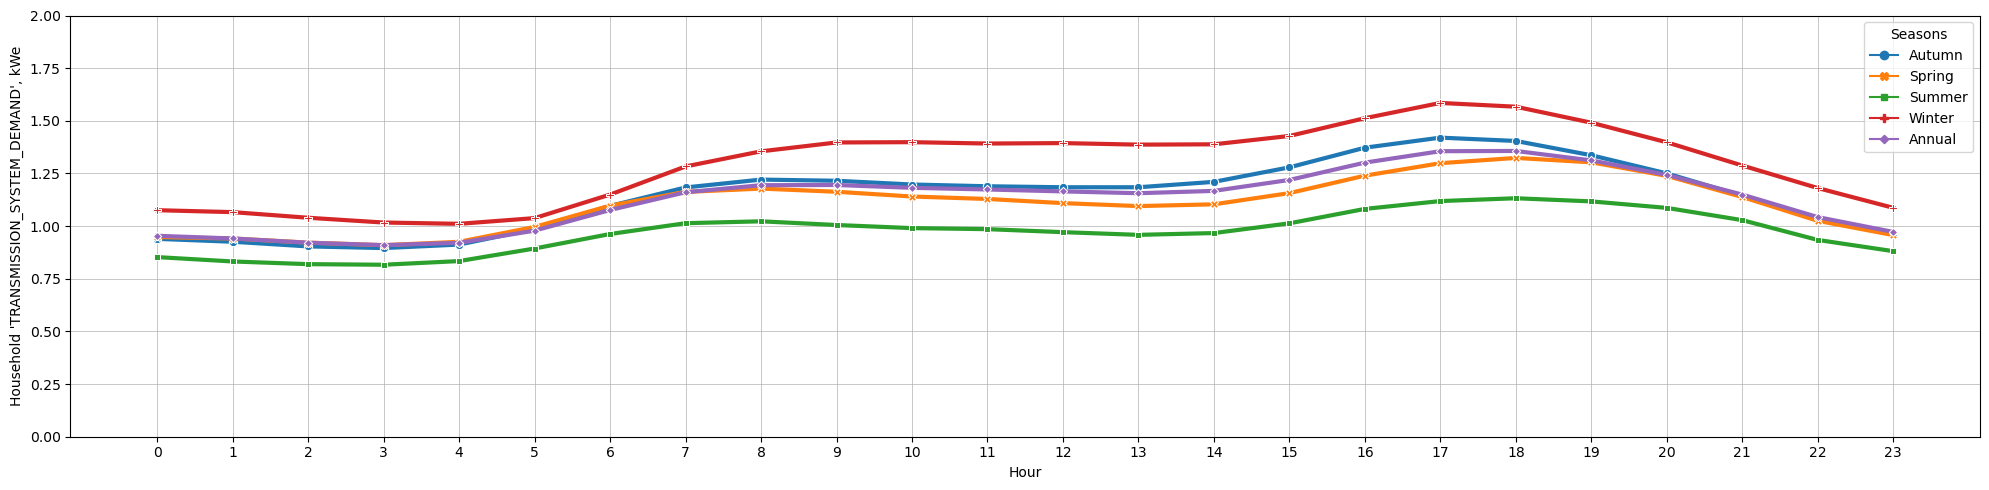

In [99]:
SeasonData_TSD = data.pivot_table(values="TRANSMISSION_SYSTEM_DEMAND", index="Hour", columns="Seasons",aggfunc='mean')
SeasonData_TSD["Annual"] = SeasonData_TSD.mean(axis=1) # Total number of Households
SeasonData_TSD.dropna(inplace=True)
SeasonData_TSD = SeasonData_TSD/24783.267
plt.figure(figsize=(20,5))
sns.lineplot(SeasonData_TSD,dashes=False,markers=True,linewidth=3)
plt.ylabel("Household 'TRANSMISSION_SYSTEM_DEMAND', kWe")
plt.ylim(0,2)
plt.xticks(range(0,24,1))
plt.grid(which='both',linewidth=0.5)
plt.tight_layout()
SeasonData_TSD.to_csv("0.DataSource/National Demand/SeasonallyAverage_TSD.csv")

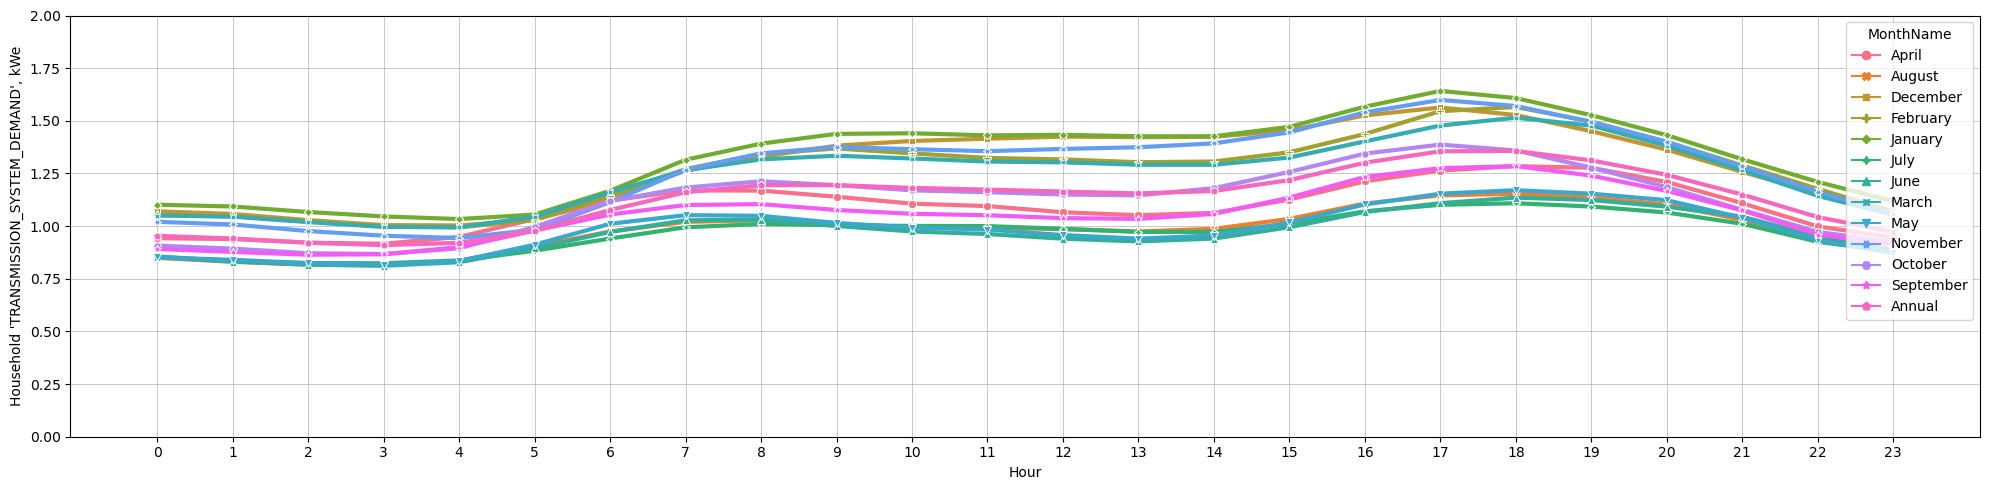

In [100]:
MonthData_TSD = data.pivot_table(values="TRANSMISSION_SYSTEM_DEMAND", index="Hour", columns="MonthName",aggfunc='mean')
MonthData_TSD["Annual"] = MonthData_TSD.mean(axis=1) # Total number of Households
MonthData_TSD.dropna(inplace=True)
MonthData_TSD = MonthData_TSD/24783.267
plt.figure(figsize=(20,5))
sns.lineplot(MonthData_TSD,dashes=False,markers=True,linewidth=3)
plt.ylabel("Household 'TRANSMISSION_SYSTEM_DEMAND', kWe")
plt.ylim(0,2)
plt.xticks(range(0,24,1))
plt.grid(which='both',linewidth=0.5)
plt.tight_layout()
MonthData_TSD.to_csv("0.DataSource/National Demand/MonthlyAverage_TSD.csv")

In [101]:
'''
SeasonData_NSD = data.pivot_table(values="NATIONAL DEMAND", index="Hour", columns="Seasons",aggfunc='mean')
SeasonData_NSD["AnnualAverage"] = SeasonData_NSD.mean(axis=1) # Total number of Households
SeasonData_NSD.dropna(inplace=True)
SeasonData_NSD = SeasonData_NSD/24783.267
plt.figure(figsize=(20,5))
sns.lineplot(SeasonData_NSD,dashes=False,markers=True,linewidth=3)
plt.ylabel("Household 'National Demand', kWe")
plt.ylim(0,2)
plt.xticks(range(0,24,1))
plt.grid(which='both',linewidth=0.5)
plt.tight_layout()
'''

'\nSeasonData_NSD = data.pivot_table(values="NATIONAL DEMAND", index="Hour", columns="Seasons",aggfunc=\'mean\')\nSeasonData_NSD["AnnualAverage"] = SeasonData_NSD.mean(axis=1) # Total number of Households\nSeasonData_NSD.dropna(inplace=True)\nSeasonData_NSD = SeasonData_NSD/24783.267\nplt.figure(figsize=(20,5))\nsns.lineplot(SeasonData_NSD,dashes=False,markers=True,linewidth=3)\nplt.ylabel("Household \'National Demand\', kWe")\nplt.ylim(0,2)\nplt.xticks(range(0,24,1))\nplt.grid(which=\'both\',linewidth=0.5)\nplt.tight_layout()\n'

In [78]:
'''
SeasonData_Gen = data.pivot_table(values="GENERATION", index="Hour", columns="Seasons",aggfunc='mean')
SeasonData_Gen["AnnualAverage"] = SeasonData_Gen.mean(axis=1) # Total number of Households
SeasonData_Gen.dropna(inplace=True)
SeasonData_Gen = SeasonData_Gen/24783.267
plt.figure(figsize=(20,5))
sns.lineplot(SeasonData_Gen,dashes=False,markers=True,linewidth=3)
plt.ylabel("Household 'GENERATION', kWe")
plt.ylim(0,2)
plt.xticks(range(0,24,1))
plt.grid(which='both',linewidth=0.5)
plt.tight_layout()
'''

'\nSeasonData_Gen = data.pivot_table(values="GENERATION", index="Hour", columns="Seasons",aggfunc=\'mean\')\nSeasonData_Gen["AnnualAverage"] = SeasonData_Gen.mean(axis=1) # Total number of Households\nSeasonData_Gen.dropna(inplace=True)\nSeasonData_Gen = SeasonData_Gen/24783.267\nplt.figure(figsize=(20,5))\nsns.lineplot(SeasonData_Gen,dashes=False,markers=True,linewidth=3)\nplt.ylabel("Household \'GENERATION\', kWe")\nplt.ylim(0,2)\nplt.xticks(range(0,24,1))\nplt.grid(which=\'both\',linewidth=0.5)\nplt.tight_layout()\n'